# Relaxation Oscillator

This example illustrates a **Relaxation Oscillator**. This is an 
oscillator built around a switching reaction, which tends to flip 
into one or other state and stay there. The relaxation bit comes 
in because once it is in state 1, a slow (relaxation) process begins 
which eventually flips it into state 2, and vice versa.
    
The model is based on Bhalla, Biophys J. 2011. It is defined in 
kkit format. It uses the deterministic gsl solver by default.
You can specify the stochastic Gillespie solver on the command line 

    ``python relaxationOsc.py gssa``
    
Things to do with the model:
    
    * Figure out what determines its frequency. You could change
      the initial concentrations of various model entities::
            
        ma = moose.element( '/model/kinetics/A/M' )
        ma.concInit *= 1.5
    
      Alternatively, you could scale the rates of molecular traffic
      between the compartments::
    
        exo = moose.element( '/model/kinetics/exo' )
        endo = moose.element( '/model/kinetics/endo' )
        exo.Kf *= 1.0
        endo.Kf *= 1.0
    
    * Play with stochasticity. The standard thing here is to scale the
      volume up and down::
    
        compt.volume = 1e-18 
        compt.volume = 1e-20 
        compt.volume = 1e-21 


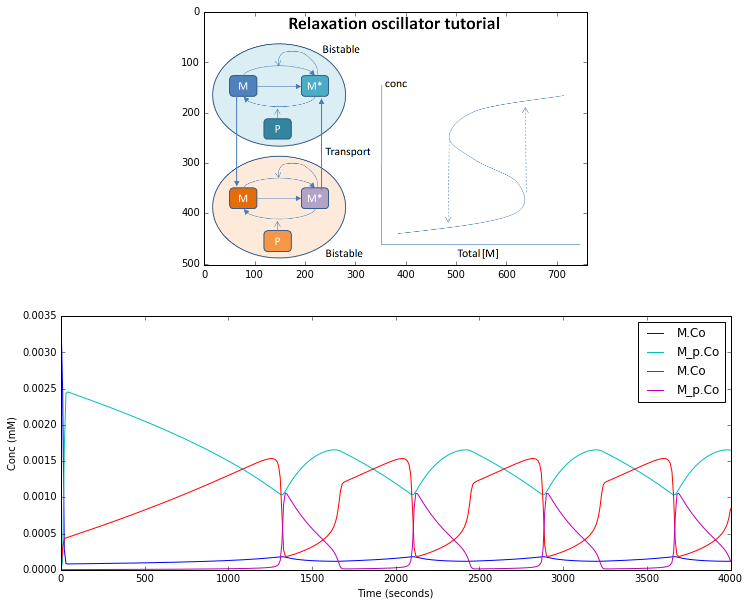

In [1]:
#########################################################################
## This program is part of 'MOOSE', the
## Messaging Object Oriented Simulation Environment.
##           Copyright (C) 2014 Upinder S. Bhalla. and NCBS
## It is made available under the terms of the
## GNU Lesser General Public License version 2.1
## See the file COPYING.LIB for the full notice.
#########################################################################

%matplotlib inline

import moose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import numpy
import sys

def main():
    
    solver = "gsl"  # Pick any of gsl, gssa, ee..
    #solver = "gssa"  # Pick any of gsl, gssa, ee..
    mfile = './OSC_Cspace.g'
    runtime = 4000.0
    if ( len( sys.argv ) >= 2 ):
            solver = sys.argv[1]
    modelId = moose.loadModel( mfile, 'model', solver )
    # Increase volume so that the stochastic solver gssa 
    # gives an interesting output
    compt = moose.element( '/model/kinetics' )
    compt.volume = 1e-19 
    dt = moose.element( '/clock' ).tickDt[18] # 18 is the plot clock.
    
    moose.reinit()
    moose.start( runtime ) 

    # Display all plots.
    img = mpimg.imread( 'relaxOsc_tut.png' )
    fig = plt.figure( figsize=(12, 10 ) )
    png = fig.add_subplot( 211 )
    imgplot = plt.imshow( img )
    ax = fig.add_subplot( 212 )
    x = moose.wildcardFind( '/model/#graphs/conc#/#' )
    t = numpy.arange( 0, x[0].vector.size, 1 ) * dt
    ax.plot( t, x[0].vector, 'b-', label=x[0].name )
    ax.plot( t, x[1].vector, 'c-', label=x[1].name )
    ax.plot( t, x[2].vector, 'r-', label=x[2].name )
    ax.plot( t, x[3].vector, 'm-', label=x[3].name )
    plt.ylabel( 'Conc (mM)' )
    plt.xlabel( 'Time (seconds)' )
    pylab.legend()
    pylab.show()

# Run the 'main' if this script is executed standalone.
if __name__ == '__main__':
	main()